Navn på gruppemedlemmer: David Omanovic, Isak Ånonli, Sebastian Siljuholtet Johansen
### &emsp; &emsp; &emsp; &emsp; TMA4320 vår 2023 - Industriell Matematikk - Prosjekt

# Dictionary learning for classification problems

***Introduction***

Dictionary learning is a machine learning technique that involves retrieving linear basis vectors from a dataset in a matrix $W$. We wish to represent the data with a small number of basis vectors without sacrificing accuracy in the representation. There are ways of doing this, and our approach will use a form of matrix factorization called Exemplar Based Non-negative matrix factorization (ENMF). $A \approx WH$, where this is a diagonalizable matrix $A = PDP^{-1}$, with for instance $W=P$ AND $H = DP^{-1}$. Contextually, the columns of W, which are the interesting features of A, corresponds to the eigenvectors of A. Eigenvectors with larger eigenvalues gives us more information about the matrix.
* $A$ stores data-set column-wise in an $ m \times n$ matrix (n datapoints of size m)
* $W \in \mathbb{R}^{m \times d}$, dictionary.
* $H \in \mathbb{R}^{d \times n}$, weights/latent variables.
* $d \ll m,n$, amount of basis vectors

We are learning a dictionary of basis vectors that represent some input data. The learned dictionary is used to transform the input data into a new representation that makes it easier to classify the data.

In the context of problems involving classification, we use dictionary learning to represent different $\textbf{classes}$ of data. The idea is to learn a dictionary that can effectively seperate input data into these classes. 

This dictionary learning is very powerful for classification problems which in our case is useful since we work with high-dimensional data which is complex. Some downsides may be that we need a large amount of data to train an dictionary that is effective, and the dictionary has to be updated as new data comes.

In this case we say the entries of matrix $A$ are pixel values, the columns of $A$ are images, the rows of $A$ are pixels, and then lastly the dictionary $W$ is the image feautures itself.

* Task 1: Throughout this task we will investigate the test matrices $A_1$ & $A_2$ below:

In [135]:
# Importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Test matrices representing two data sets, each column is a datapoint
A1 = np.array([[1000, 1], [0, 1], [0, 0]], dtype=np.double)
A2 = np.array([[1, 0, 0], [1, 0, 0], [0, 0, 1]], dtype=np.double)

b1 = np.array([2, 1, 0], dtype=np.double)
b2 = np.array([0, 0, 1], dtype=np.double)
b3 = np.array([0, 1, 0], dtype=np.double)

# Concatenated matrix of the b vectors
B = np.array([b1, b2, b3], dtype=np.double).T


# Task 1 a)

First off we have a generalization of matrix diagonalization which is called the *Singular Value Decomposition (SVD)*. Any matrix $A$ that is $m \times n$ has an unique SVD that is defined as
$A = U \Sigma V^T$, where $U$ is an orthogonal $m \times m$ matrix, V is orthogonal $n \times n$ matrix, and $\Sigma$ is a diagonal matrix and holds $A$ matrix's singular values.
We implement the numpy method *np.linalg.svd* to extract these matrices to make our lives easier.

In [136]:
# Calculate the A1's SVD
U, Σ_matrix, Vh = np.linalg.svd(A1, full_matrices=False)
Σ = np.diag(Σ_matrix)

# Print the individual matrices
print("Dictionary U matrix: \n", U, "\n")  # U
print("Σ Diagonal Matrix: \n", Σ, "\n")  # Σ
print("V hermitian matrix: \n", Vh, "\n")  # V_T

# Confirm that A1 = U*Σ*Vh
print("A1: \n", A1)
print("UΣV^T: \n", U @ Σ @ Vh)


Dictionary U matrix: 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]] 

Σ Diagonal Matrix: 
 [[1.0000005e+03 0.0000000e+00]
 [0.0000000e+00 9.9999950e-01]] 

V hermitian matrix: 
 [[ 0.9999995  0.001    ]
 [-0.001      0.9999995]] 

A1: 
 [[1000.    1.]
 [   0.    1.]
 [   0.    0.]]
UΣV^T: 
 [[ 1.00000000e+03  1.00000000e+00]
 [-2.18499053e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


***Task 1 a - answer:***
To see that this method is valid, we multiply the extracted matrices from the np.linalg.svd and see that we almost get $A_1$ back.

We can see that there are small roundoff errors in the calculated matrix for $A_1$, but these are expected due to float inaccuracies. 

The most important basis vector in the dictionary $W_1=U$ for reconstructing $A_1$ is the first vector of $W_1$ because it corresponds to the largest singular value in the matrix $\Sigma$. The $\Sigma$ matrix is ordered meaning the largest singular value is the one all the way to the left in the matrix and the smallest to the right. The larger a singular value is, the more important it is for reconstructing the original matrix.

# Task 1 b)

Further on we extract these matrices for our second test matrix $A_2$. Do any of the vectors carry $\textbf{no}$ relevant information about matrix $A_2$? Below we inspect the matrices,

In [137]:
# Calculate the SVD A2
U2, Σ2_matrix, Vh2 = np.linalg.svd(A2, full_matrices=False)
Σ2 = np.diag(Σ2_matrix)

# Print the individual matrices for SVD of A2
print("U2 matrix: \n", U2, "\n")  # U
print("Σ2 Diagonal Matrix: \n", Σ2, "\n")  # Σ
print("V^T2 hermitian matrix: \n", Vh2, "\n")  # V_T

# Confirm that A1 = U*Σ*Vh
print("A2: \n", A2, "\n")
print("U2 Σ2 V^T2: \n", U2 @ Σ2 @ Vh2)


U2 matrix: 
 [[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]] 

Σ2 Diagonal Matrix: 
 [[1.41421356 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.        ]] 

V^T2 hermitian matrix: 
 [[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]] 

A2: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

U2 Σ2 V^T2: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


***Task 1 b - answer***
If we inspect the Σ Diagonal Matrix, we can see that the last column vector is the zero vector. This holds no significant information about $A_2$, and for the matrix $U$ this corresponds to the last basis vector. We also see that this fits with the singular value description we wrote earlier as the $\Sigma_2$ matrix  has a zero diagonal element all the way to the right corresponding the the last column vector.

This tells us that the last column of $A_2$ is redundant. They hold the same datapoints at the exact same place. Thus we can remove one of the vectors to then obtain $A_2 = U_d \Sigma_d V_d^T$ such that we have the dictionary $W_2=U_d$ because as we discussed earlier, we want to have a small amount of basis vectors without compromising the accuracy.

In [138]:
def truncSVD(U, Σ, Vh, d):
    """
    Remove redundant basis vectors after the 'd'th column vector

    Parameters
    ----------
    U: unitary array (obtained from SVD) array_like
    Σ: rectangular diagonal matrix with
    non-negative real singular values (obtained from SVD)
    Vh: conjugate transpose of V (unitary matrix from SVD)
    d: factor to remove the (m-d) last columns of the SVD.

    Returns
    --------
    Low-rank matrix approximation of SVD matrices from an matrix A.
    Σ_d: truncated singular value matrix by size d
    W: truncated U (m x d) matrix
    H: the weights/latent variables
    """

    # Check for redundancies:
    W = U[:, :d]  # Dictionary with orthogonal columns
    Σ_d = Σ[:d, :d]  # Reduced singular value matrix
    Vh_d = Vh[:d, :]  # Reduced unitary matrix
    H = Σ_d @ Vh_d  # The weights

    return Σ_d, W, H


d = 2  # Appropriate d < 3 for truncation

# Truncating the obtained SVDs
Σ_d1, W1, H1 = truncSVD(U, Σ, Vh, d)
Σ_d2, W2, H2 = truncSVD(U2, Σ2, Vh2, d)

# Print out the matrices and check the results
print("A2 = \n", A2, "\n")
print("U = \n", U, "\n")
print("Σ = \n", Σ, "\n")
print("W1 = \n", W1, "\n")
print("U2 = \n", U2, "\n")
print("Σ2 = \n", Σ2, "\n")
print("W2 = \n", W2, "\n")
print("A2 = W*H \n", W2 @ H2)


A2 = 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

U = 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]] 

Σ = 
 [[1.0000005e+03 0.0000000e+00]
 [0.0000000e+00 9.9999950e-01]] 

W1 = 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]] 

U2 = 
 [[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]] 

Σ2 = 
 [[1.41421356 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.        ]] 

W2 = 
 [[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [ 0.          1.        ]] 

A2 = W*H 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


As we see, we removed the basis vector from $A_2$ that held no relevant information about the matrix. So when we do the multiplication with the dictionary and the latent variables $A = WH$ we should expect to get out matrix $A_2$ back. Clearly we can see in the last print statement that they are identical! As such a well chosen d = 2 works!

# Task 1 c)

Further on we want to take in a dictionary $W$ with orthogonal columns and project some arbitrary matrix $B$ onto it. This is because we want to represent a new datapoint $b \approx Wh$ from the basis vectors of the dictionary by selecting the representation that is closest to $b$. It is simple to implement as it is just the matrix product $P_W(B) = W(W^TB)$. In Python we do this easily with the $@$ operator, and implement it in our function "orthproj".

Columnwise distances from $B$ to $W$ are even more simple to implement with a single call from np.linalg.norm gives us the Frobenius norm per column with the argument "axis = 0". It is implemented as the function "columndistance"

In [139]:
def orthproj(W, B):
    """
    Projects matrix B onto basis W

    Parameters
    ----------
    W: a dictionary/basis with orthogonal columns
    B: matrix to be projected 

    Returns
    --------
    The projection of the matrix onto the columns of W
    """
    # Calculate the projection of B onto W
    return W @ (W.T @ B)


def columndistance(P, B):
    """
    Calculates the Euclidian norm per column for the distance B to P

    Parameters
    ----------
    P: an orthogonal projection
    B: arbitrary matrix

    Returns
    --------
    Euclidian distance from projection to B
    """
    return np.linalg.norm(B - P, axis=0, ord=2)  # Euclidian distance per column


# Calculates the orthogonal projections
P1 = orthproj(W1, B)
P2 = orthproj(W2, B)

# Prints the orthogonal projections
print("P1: \n", P1, "\n")
print("P2: \n", P2, "\n")

# Prints the columnwise distance
L = columndistance(P1, B)  # Distance
print("Columnwise distance of B->P1: \n", L, "\n")

L = columndistance(P2, B)  # Distance
print("Columnwise distance of B->P2: \n", L, "\n")


P1: 
 [[2.00000000e+00 0.00000000e+00 8.32531736e-23]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]] 

P2: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]] 

Columnwise distance of B->P1: 
 [0.00000000e+00 1.00000000e+00 1.11022302e-16] 

Columnwise distance of B->P2: 
 [0.70710678 0.         0.70710678] 



We observe that $D_{W_1}(B) \approx [0, 1, 0]$ as expected because $b_1$ and $b_3$ are clearly in the range of $A_2$, whereas $b_2$ is not. Unfortunately we see a small numerical roundoff error for $b_3$ with an order of $10^{-16}$ which is probably due to floating point errors.

# Task 1 d)

Now as we have implemented an SVD approach as well as some functions to find the orthogonal projection and columnwise distance, we want to try out the Exemplar Based Negative Matrix Factorization (ENMF) approach.

We start off by making a function that takes in a non-negative dictionary $W_+$  and calculates the non-negative projection $H^* = \arg  \min_ {H_+ \in \mathbb{R}^{d \times n}} \|A-W_+H_+\|_F^2$, so that $H_+$ is non-negative, with some numerical algorithm. Implementing it in our function "nnproj" we obtain:

In [140]:
def nnproj(W, A, maxiter=50, delta=10**(-10)):
    """
    Takes in a dictionary W and matrix A and calculates the
    non negative projection of A onto W.

    Parameters
    -----------
    W: non-negative dictionary
    A: Matrix for ENMF approach
    maxiter: max iterations for finding the weight
    delta: safe-division factor 

    Returns
    -----------
    nnP_W: Non-negative projection
    H_p: Non-negative weights/latent variables
    """

    # Initial constants to make calculations late more effcient
    WTA = W.T @ A
    WTW = W.T @ W

    # Initial non-negative estimate for H_+
    # Initial non-negative estimate for H_+
    H_p = np.random.uniform(0, 1, np.shape(WTA))

    # Multiplicative update (eqn. 20) for finding H*
    for k in range(maxiter):
        H_p *= WTA / (WTW @ H_p + delta)

    # Calculate the non-negativ projection
    nnP_W = W @ H_p

    # Return the non-negativ projection and non negativ weights/latent variables
    return nnP_W, H_p


# Non negative projections of the test matrices A1 and A2
P_A1, H1 = nnproj(A1, B)
P_A2, H2 = nnproj(A2, B)

# Prints the projections
print("P_A1+: \n", P_A1, "\n")
print("P_A2+: \n", P_A2, "\n")

# Prints the test to check if the bases is correct
print("B:")
print(B)
print("test:")
print(A1 @ H1)

# Calculate the columnwise distance for both of the tests
D_A1 = columndistance(P_A1, B)
print("D_A1(B): \n", D_A1, "\n")

D_A2 = columndistance(P_A2, B)
print("D_A2(B): \n", D_A2, "\n")


P_A1+: 
 [[2.00036768 0.         0.5       ]
 [0.99926383 0.         0.5       ]
 [0.         0.         0.        ]] 

P_A2+: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]] 

B:
[[2. 0. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
test:
[[2.00036768 0.         0.5       ]
 [0.99926383 0.         0.5       ]
 [0.         0.         0.        ]]
D_A1(B): 
 [8.22876077e-04 1.00000000e+00 7.07106781e-01] 

D_A2(B): 
 [7.07106781e-01 9.99998973e-11 7.07106781e-01] 



We calculate $P_{A_1}^+(B)$ & $P_{A_2}^+(B)$ and print the resulting weights and the projections to confirm our algorithm is working. We can just reuse our function to calculate the distances and we observe that $D_{A_1}(B) \approx [0, 1, \frac{1}{\sqrt2}]$ as we expected, but with some numerical error because projections onto cones as we are doing now, are different than linear subspaces we did previously.

Now we will go over to the area of interest which is of course... images! This is amazing, we can now use math to identify digits in images.

# Task 2 a)

We will utilize grayscale images, that have integer pixel values between 0 and 255. To test our algorithms and machine learning models, we use the MNIST dataset. Each image is $28 \times 28$ pixels for a total of 784 pixels. We will look at the images one integer at a time, so we seperate the data into a training set.

Now we will load the datasets of integers and plot 16 images of our choice on a $4 \times 4$ grid.

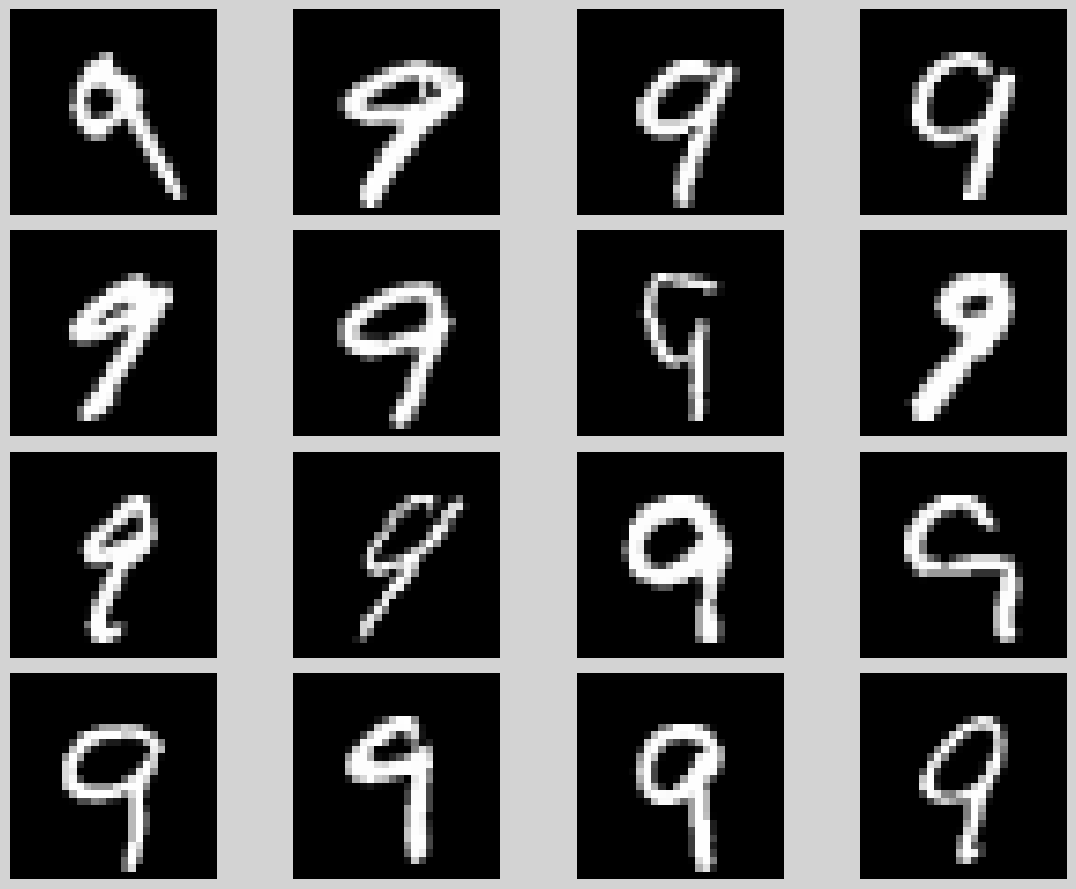

In [141]:
# Load the data and rescale
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

def plotimgs(imgs, nplot=4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise

    Parameters
    -----------
    imgs: (height*width,N) array containing images, where N > nplot**2
    nplot: integer, nplot**2 images will be plotted

    Returns
    -----------

    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert (n > nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot, nplot, figsize=(12, 9))

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot
        j = idx % nplot

        # Remove axis
        axes[i, j].axis('off')

        axes[i, j].imshow(imgs[:, idx].reshape((m, m)), cmap="gray")

    # Plot
    fig.tight_layout()
    plt.show()


# Plot first 16 images of the nine integer
plotimgs(test[:, 9, :], nplot=4)


Here we have loaded 16 different images of the integer "9".

# Task 2 b)

We will further calculate the SVD for a matrix $A$, where $A$ contains a dataset of only one integer columnwise.

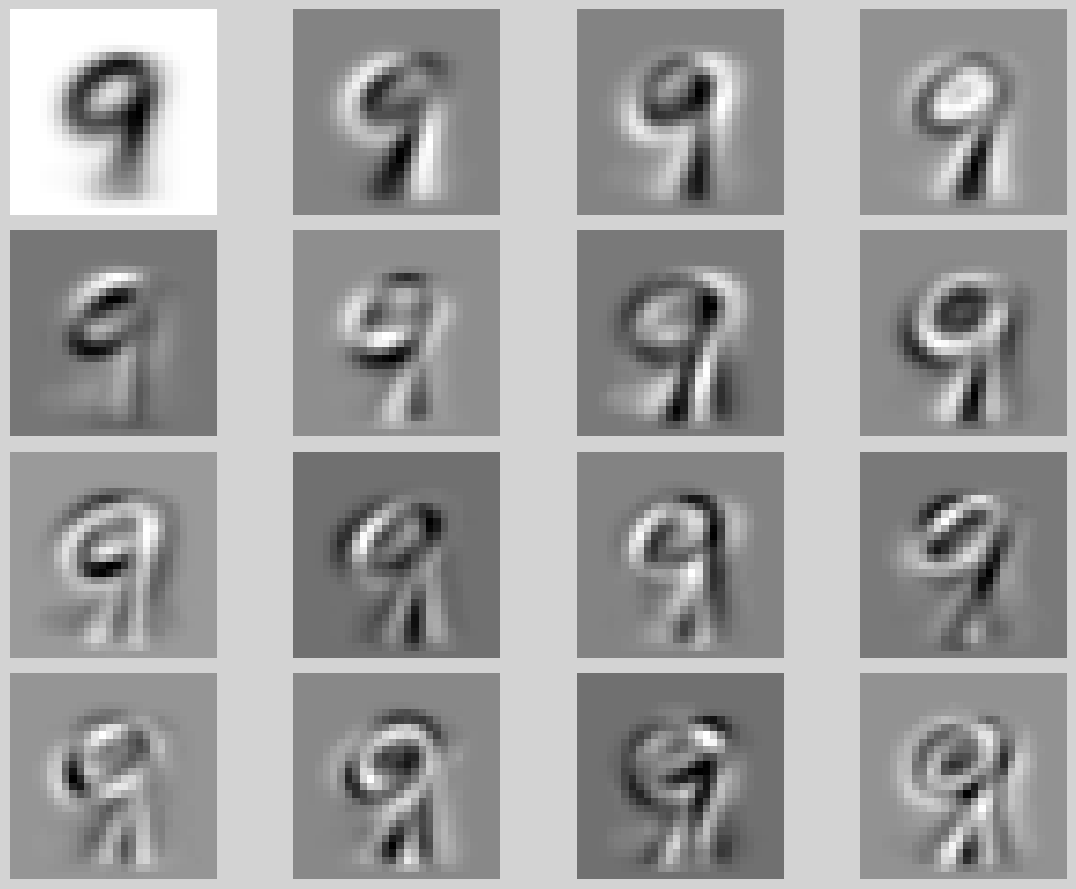

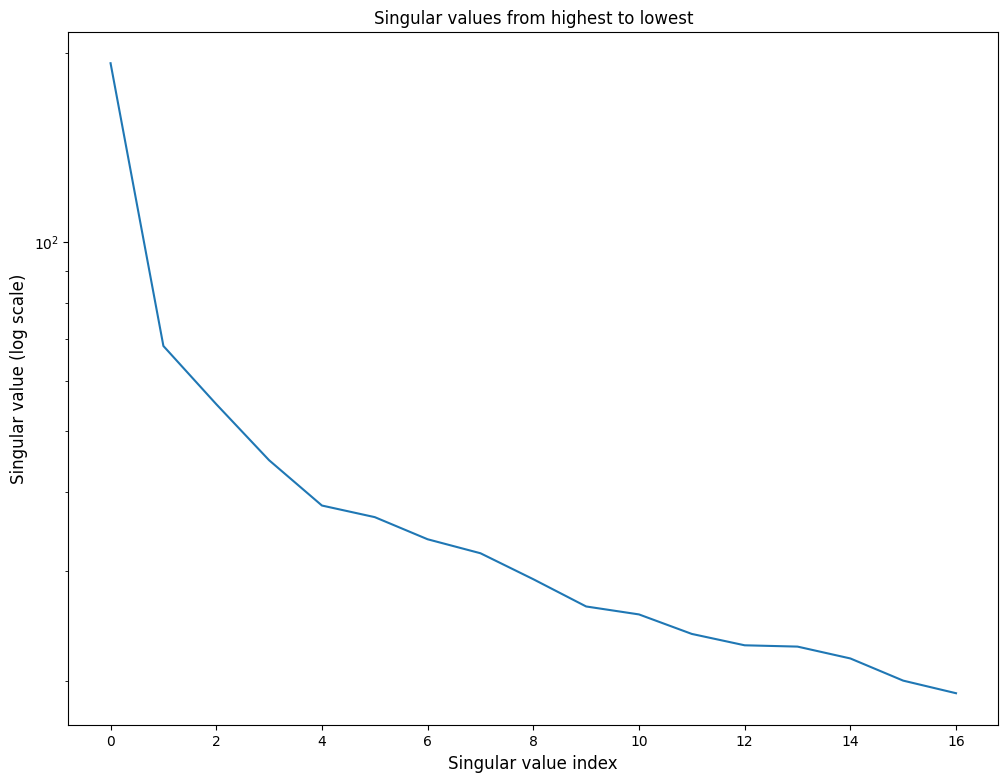

In [142]:
def decomposeTruncateData(A, d):
    """
    Takes in data in the form of images, and applies the SVD approach on the data
    and returns the SVD components for the images

    Parameters
    -----------
    A: 2d array with images from the given data, on the from of date[:, int, :]
    d: factor to remove the (m-d) last columns of the SVD

    Returns
    -----------
    Σ_d: diagonal matrix vith singuler values on the diagonal
    W: Ud, the reduced (m x d) matrix and the weights
    H: Σ_d * Vh_d, where Vh_d is the (d x n) matrix obtained by
    removing the n-d columns of V_d and Σ_d the (d x d) matrix obtained by
    removing rows and columns from Σ.
    """
    # Calculate the SVD
    U, Σ, Vh = np.linalg.svd(A, full_matrices=False)
    Σ = np.diag(Σ)

    # Returns Σ_d, W, H from the function truncSVD
    return truncSVD(U, Σ, Vh, d)


# Runs the function with data from test
Σ_d, W, H = decomposeTruncateData(test[:, 9, :], 17)
# Plots first 16 singular vectors for the nine integer
plotimgs(W, nplot=4)
plt.figure(figsize=(12, 9))

# Plots the singuler values from the lowest to the higest
plt.title("Singular values from highest to lowest", fontsize=12)
plt.semilogy(np.arange(0, Σ_d.shape[0], 1), np.diag(Σ_d))
plt.xlabel('Singular value index', fontsize=12)
plt.ylabel('Singular value (log scale)', fontsize=12)
plt.show()


The basis vectors can be seen to capture the most important features of the integers, as in this case its shape. For us humans observing the plots, it is easily identifiable that these are the integers we chose. 

In the case of digit recognition, the SVD basis vectors represent the variations and patterns that distinguish one digit from another, capturing the essential features of the dataset. Each singular vector corresponds to a distinct pattern or feature shared by images of a specific digit. These patterns can be used to reconstruct or approximate any digit image. As a result, SVD basis vectors can be thought of as a compressed representation of the dataset that captures the most important information.

In a deeper analysis of the singular values we observe that for index $\approx 450$, the singular value drops drastically (essentially to zero).
The singular values represent the importance of each corresponding singular vector in approximating the original matrix using the truncated SVD. When the singular values drop down to essentially zero after a certain index, it means that those singular vectors are not very important for approximating the original matrix. This is exactly the same as we were discussing in task 1b). It tells uss that we can just truncate off these singular values.

# Task 2 c)

<Figure size 1000x700 with 0 Axes>

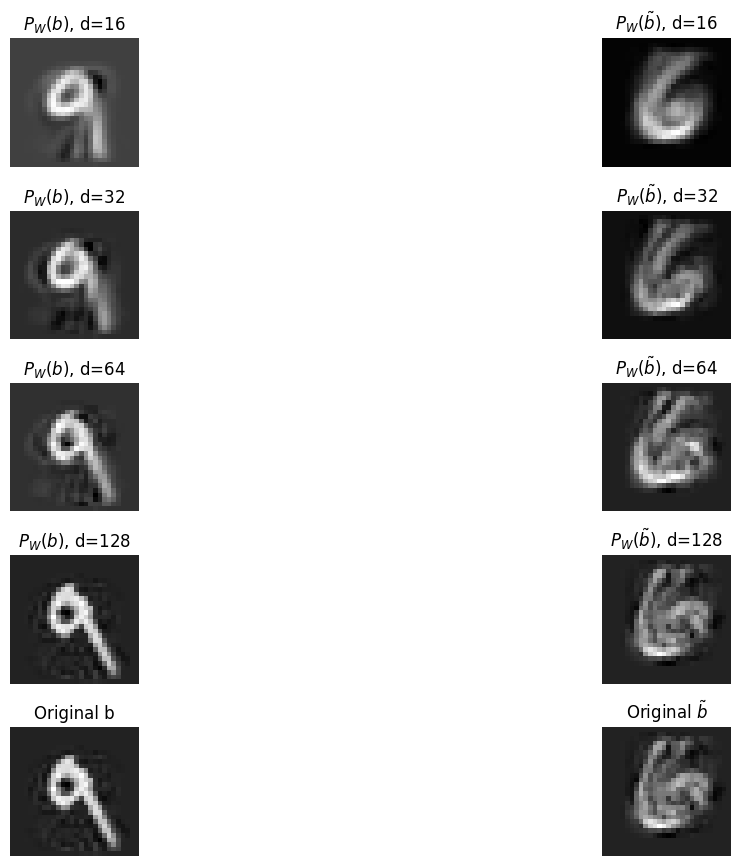

In [143]:
def plotOrthProj(b, D, b_tilde):
    """
    Takes in data from an arbitrary image, and applies the SVD approach on the data.
    Then it projects both data sets on the basis made from the A matrix, and plots the
    result som both projections for different values of d

    Parameters
    -----------
    A: 2d array with images from the given data, on the from of date[:, int, :]
    D: an array of values d: factor to remove the (m-d) last columns of the SVD
    bcompare: 2d array with images from the given data, on the from of date[:, int, :] with a diffrent int than A

    """
    plt.figure(figsize=(10, 7)) 

    # Sets subplots
    fig, axes = plt.subplots(len(D) + 1, 2, figsize=(12,9))

    # Calculate the SVD
    U, Σ, Vh = np.linalg.svd(b, full_matrices=False)
    Σ = np.diag(Σ)

    # For loop for each value of d in D
    for i in range(len(D)):

        # Gets the basis for A with the given value of d in D in
        Σ_d, W, H = truncSVD(U, Σ, Vh, D[i])

        # Calculates the projection of A and bcompare to the basis of A
        P = orthproj(W, b)
        Pb = orthproj(W, b_tilde)

        # Plots each of the images
        axes[i, 0].axis('off')
        axes[i, 0].imshow(P[0].reshape((28, 28)), cmap='gray')
        axes[i, 0].title.set_text(r"$P_{W}(b)$, d=" + str(D[i]))
        axes[i, 1].axis('off')
        axes[i, 1].imshow(Pb[0].reshape((28, 28)), cmap='gray')
        axes[i, 1].title.set_text(r"$P_{W}(\tilde{b})$, d=" + str(D[i]))

    fig.tight_layout()
    axes[len(D), 0].axis('off')
    axes[len(D), 0].imshow(P[0].reshape((28, 28)), cmap='gray')
    axes[len(D), 0].title.set_text("Original b")
    axes[len(D), 1].axis('off')
    axes[len(D), 1].imshow(Pb[0].reshape((28, 28)), cmap='gray')
    axes[len(D), 1].title.set_text(r"Original $\tilde{b}$")

    plt.show()


# Decides the d values and runs the function with data from test
D = np.array([16, 32, 64, 128])
plotOrthProj(test[:, 9, :].T, D, test[:, 6, :].T)


By looking at the plotted images we clearly see that the image projection that corresponds to the training data become clearer and cleared for a higher d and always looks like it should. However, for the other projection we also clearly see that it doesnt always correspond to the original image and it is blurred with a lower d and deviates more and more fromn the original digit with a higher d.

# Task 2 d)

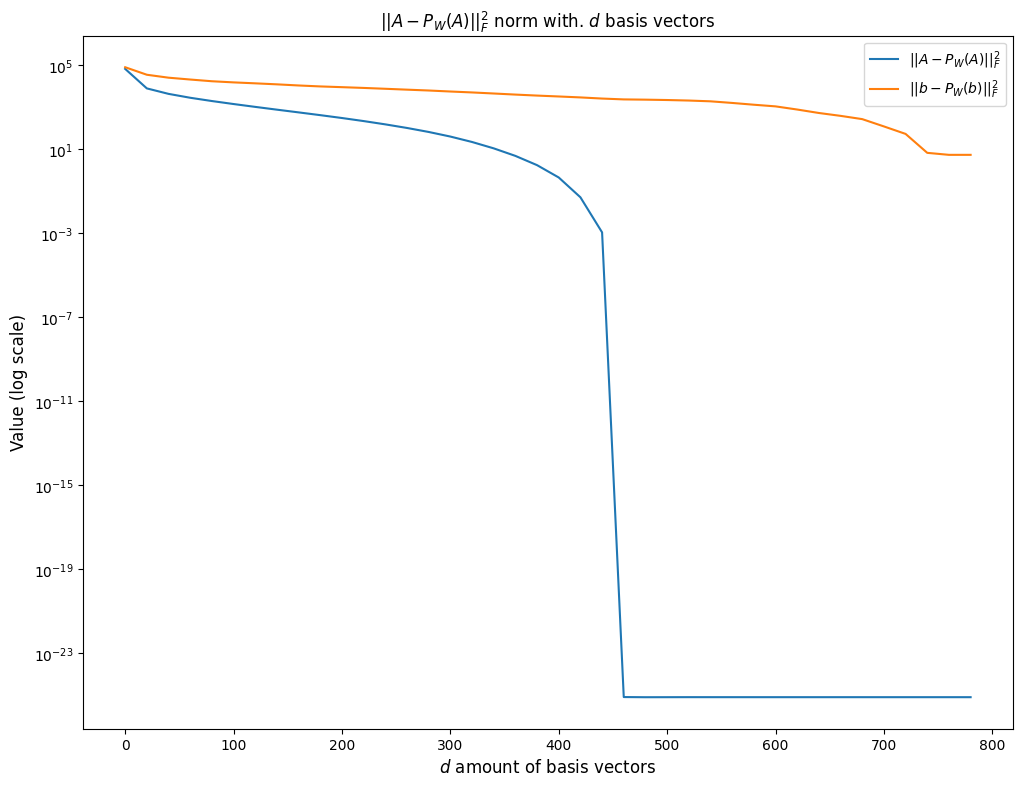

In [144]:
def distances_SVD(A, D, bcompare, onlyComp=False):
    """
    Takes in data in the form of images, and applies the SVD approach on the data
    and calculates the distances of the images to the basis of the images
    it is trained to.

    Parameters
    -----------
    A: 2d array with images from the given data, on the from of date[:, int, :]
    D: an array of values d: factor to remove the (m-d) last columns of the SVD
    bcompare: 2d array with images from the given data, on the from of date[:, int, :] with a diffrent int than A
    plot: bool that decides if the functions should be plotted.
    onlyComp: a bool that decides if it only calculates the norm for the compear function, it is used in Task 3

    Returns
    -----------
    norms: an array of the norm values for the matrix A to its basis
    normsb: an array of the norm values for the matrix B to the basis of A basis

    """
    # Calculate the SVD
    U, Σ, Vh = np.linalg.svd(A, full_matrices=False)
    Σ = np.diag(Σ)

    # Test if onlyComp is set to True, this is used in Task 3
    if onlyComp == True:

        # Gets the basis for A with the given value of D
        W = truncSVD(U, Σ, Vh, D)[1]

        # Calculates the distance between the projection of b onto W and b
        distances = columndistance(orthproj(W, bcompare), bcompare)

        # Returns distances
        return distances

    # Runs if onlyComp is set to False, is used for this task
    else:
        # Set empty arrays to be used for each of the values of d
        distancesA = np.zeros(len(D))
        distances = np.zeros(len(D))

        # For loop for each value of d in D
        for (i, d) in enumerate(D):
            # Gets Σ_d, W, H from the function truncSVD
            Σ_d, W, H = truncSVD(U, Σ, Vh, d)
            # Calculates the norm of the difference between the projection of A onto W and A
            distancesA[i] = (np.linalg.norm(A - orthproj(W, A)))**2
            # Calculates the norm of the difference between the projection of b onto W and b
            distances[i] = (np.linalg.norm(bcompare - orthproj(W, bcompare)))**2

        # Plots the distance values for A and bcompare for each d value.
        plt.figure(figsize=(12, 9))
        plt.title(rf"$||A-P_W(A)||_F^2$ norm with. $d$ basis vectors", fontsize=12)
        plt.semilogy(D, distancesA, label="$||A-P_W(A)||_F^2$")
        plt.semilogy(D, distances, label="$||b-P_W(b)||_F^2$")
        plt.xlabel(rf"$d$ amount of basis vectors", fontsize=12)
        plt.ylabel(rf"Value (log scale)", fontsize=12)
        plt.legend()
        plt.show()

        # Returns the distances corresponding to A and bcompare
        return distancesA, distances


# Decides the d values and runs the function
D = np.arange(0, 784, 20)
distancesA, distances = distances_SVD(test[:, 9, :], D, test[:, 2, :])


The matrix norm measures the distance between matrices $A$ and $P_W(A)$. We can see that it follows the same exact trend as for task 2b). The singular values are related to the Frobenius norm of the matrix $A$.

The singular values of $A$ represent the magnitudes of the linear transformations that $A$ can perform in different directions. It can be shown that the Frobenius norm of $A$ is equal to the square root of the sum of the squares of its singular values.

Since the Frobenius norm is a measure of the "size" or "magnitude" of a matrix, and the singular values represent the amount of information contained in each basis vector, it makes sense that the norm of A follows the same trend as the singular values.

# Task 2 e)

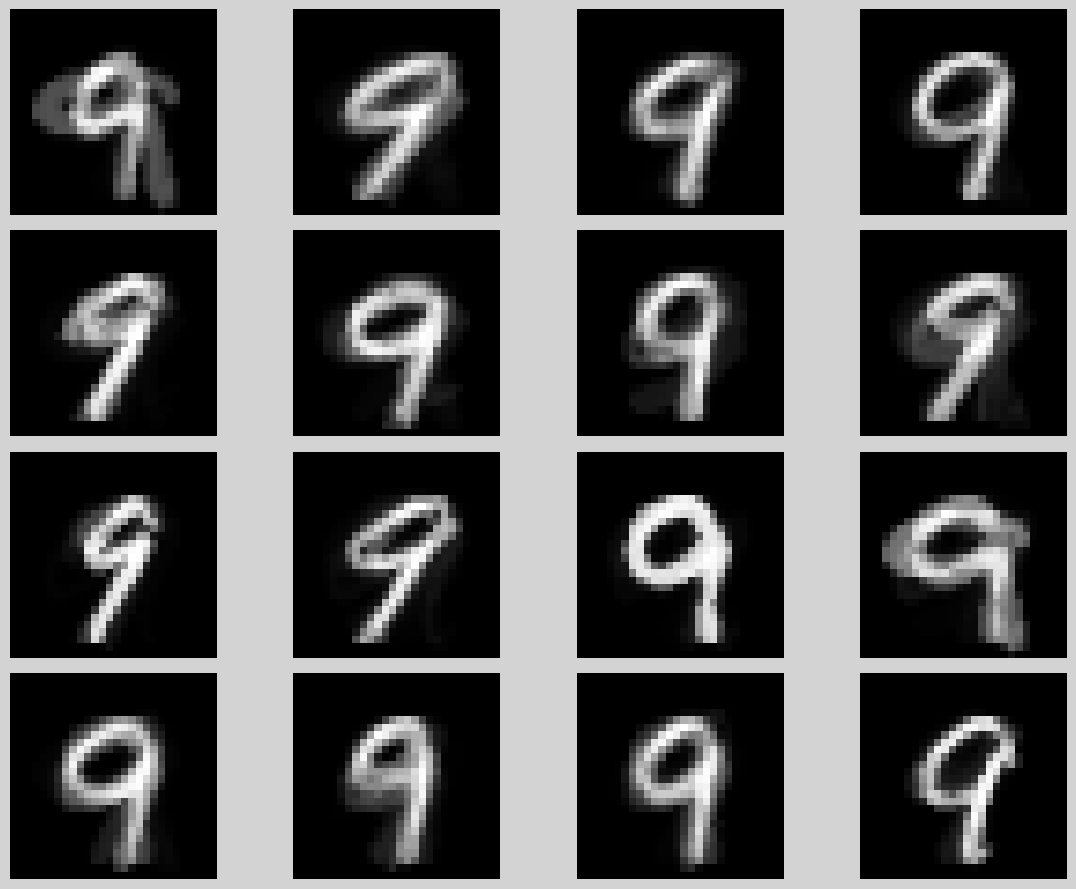

In [145]:
def construct_ENMF(A, b, d):
    """
    Takes in data in the form of images, and applies the EMNF approach on the data
    and returns the ENMF components for the images along with its projections

    Parameters
    -----------
    A: 2d array with images from the given data, on the from of date[:, int, :]
    b: the basis 
    d: factor that decides the size of the randomly selectet basis W_pluss

    Returns
    -----------
    P_plus: The projections to the basis W_plus
    H_plus: The non-negative weights/latent variables
    W_plus: The randomly selected basis the approach is using

    """
    # Chooses d amount of random columnss of A
    indexes = np.random.choice(A.shape[1], d, replace=False)

    # Create the basis of the random columnss
    W_plus = A[:, indexes]

    # Calculates the projection and weights of the matrix in the basis of A
    P_plus, H_plus = nnproj(W_plus, b)

    # Returns P_plus, H_plus, W_plus
    return P_plus, H_plus, W_plus


# Runs the function with the data from test and plots the first 16 images of the projection
P_plus, H_plus, W_plus = construct_ENMF(test[:, 9, :], test[:, 9, :], d=32)
plotimgs(P_plus, nplot=4)


We can see that the ENMF approach is able to reconstruct the digit reasonably well, with some loss of detail compared to the original image because the bases are different. The advantage of the ENMF approach is that it is able to represent the data as a product of two low-rank matrices, which can be computationally more efficient than the SVD approach for very large datasets.

# Task 2 f)

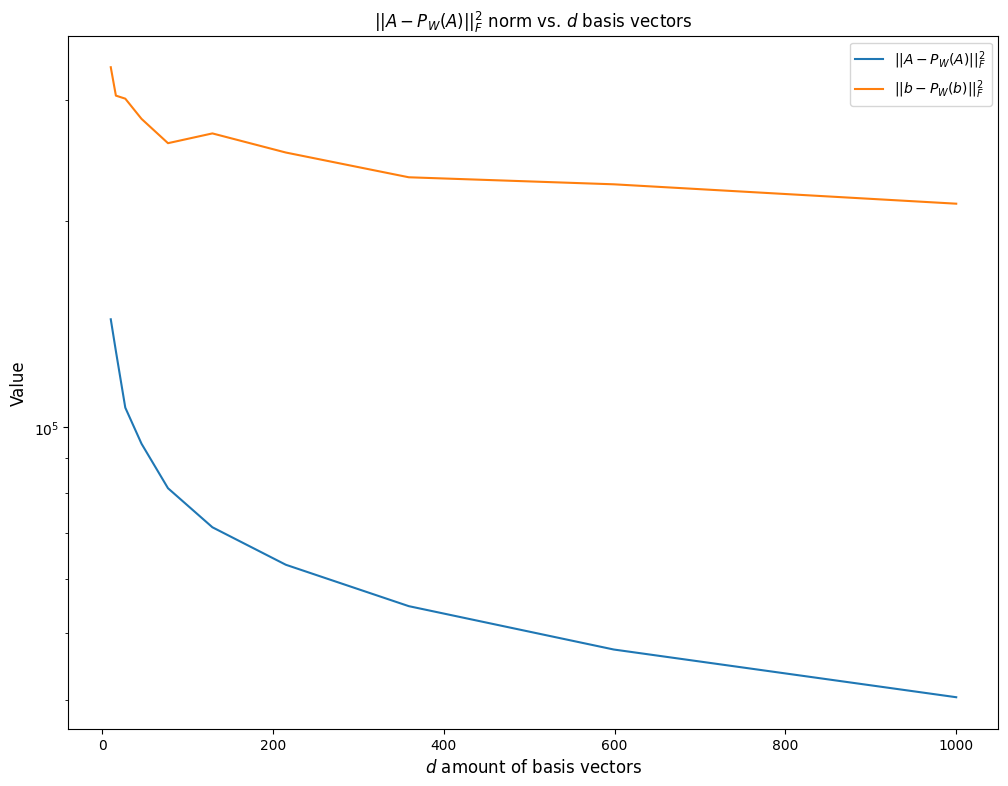

array([334633.53255476, 304197.92613445, 301119.19933971, 281377.03027495,
       259311.38869572, 267951.95422453, 251298.19302295, 231258.37928133,
       225867.09481662, 211637.5132262 ])

In [146]:
def distances_ENMF(A, D, bcompare, onlyComp=False):
    """
    Takes in data in the form of images, and applies the EMNF approach on the data
    and and calculates the distances for the images to the basis of the images
    it is trained to.

    Parameters
    -----------
    A: 2d array with images from the given data, on the from of date[:, int, :]
    D: an array of values d: factor to remove the (m-d) last columns of the SVD
    bcompare: 2d array with images from the given data, on the from of date[:, int, :] with a diffrent int than A
    plot: bool that decides if the functions should be plotted.
    onlyComp: a bool that decides if it only calculates the norm for the compear function, it is used in Task 3

    Returns
    -----------
    norms: an array of the length values for the matrix A to its basis
    normsb: an array of the length values for the matrix B to the basis of A basis
    """
    # Test if onlyComp is set to True, is used in Task 3
    if onlyComp == True:

        # Calculates the projection usedto calculate the length
        P_plus, H_plus, W_plus = construct_ENMF(A, bcompare, D)

        # Calculates the distance between the projection of b onto W and b
        distances = columndistance(P_plus, bcompare)

        # returns the lengths of bcompare
        return distances

    # Runs if onlyComp is set to False, is used in this task
    else:
        # Set empty arrays to be used for eatch of the values of d
        distancesA = np.zeros(len(D))
        distances = np.zeros(len(D))

        # For loop for eatch value of d in D
        for (i, d) in enumerate(D):

            # Calculates the projection used to calculate the length
            P_plus = construct_ENMF(A, A, d)[0]
            P_plusb = construct_ENMF(A, bcompare, d)[0]

            # Calculates the norm of the difference between the projection of A onto W and A
            distancesA[i] = (np.linalg.norm(A - P_plus))**2
            # Calculates the norm of the difference between the projection of b onto W and b
            distances[i] = (np.linalg.norm(bcompare - P_plusb))**2

        # Plots the distance values for A and bcompare for each d value.
        plt.figure(figsize=(12, 9))
        plt.title(rf"$||A-P_W(A)||_F^2$ norm vs. $d$ basis vectors", fontsize=12)
        plt.semilogy(D, distancesA, label="$||A-P_W(A)||_F^2$")
        plt.semilogy(D, distances, label="$||b-P_W(b)||_F^2$")
        plt.xlabel(rf"$d$ amount of basis vectors", fontsize=12)
        plt.ylabel(rf"Value", fontsize=12)
        plt.legend()
        plt.show()

        return distances  # Returns the lengths of A and bcompare


# Runs the functions and plots the projections
D = np.logspace(1, 3, 10, dtype=np.int64)
distances_ENMF(train[:, 9, :], D, train[:, 2, :], onlyComp=False)


We can see that for the original digit, the error decreases rapidly with increasing rank and levels off at around rank=50, indicating that the ENMF approach is able to capture most of the important features of the digit with a relatively low-rank approximation. However, for the different digit, the error does not decrease as rapidly and levels off at a higher value, indicating that the ENMF approximation is not as accurate for this digit.

Overall, both the SVD and ENMF approaches are able to capture the important features of the digit datasets, with some loss of detail in the reconstructed images. The choice of method will depend on the specific computational requirements and the desired level of accuracy in the approximation.


Over to classification we want to categorize our digits into seperate distinct classes. Now we will say each digit has its own class. We want to perform automatic classification by assigning a given input to predefined set of classes based on our SVD and ENMF algorithms. This is fully automated without any input by us; the users. 

First off to start this automatic classification we learn the mathematical structure from the training data (the dictionaries $W$), then we can test the method on the test data. The test data is not the same as the training data. We will in this case only do classification for a subset of digits. 

# Task 3 a)

We start off by implementing a function that takes in a test dataset stored in matrix $B$, and a list of dictionaries that is the "imagebase". Further on we project the data onto the bases and store distances per basis. 

In [147]:
def distance(B, imagebase, approach, digits, d = 32):
    """ 
    Takes in data in the form of images, and applies the EMNF approach on the data
    and and calculates the distances for the images to the basis of the images
    it is trained to. It does this using the method specified in the "approach" parameter.
    
    Parameters
    -----------
    B: Test dataset of images, stored columnsvise
    imagebase: base of all images that is used for training
    approach: type of approach to slolution (SVN, ENMF)
    digits: python list. Contains desired integers
    d: amount of data that is being removed
    

    Returns
    distances: the length values for the matrix B onto each digit basis.
    -----------
    """
    # Sets n as the shape of the collums of B
    n = B.shape[1]

    # Create empty arrays that have the size (len(digits), collums of B)
    distances = np.zeros((len(digits), n))

    # Turnes digits in to an numpy array so it can be used later
    digits = np.array(digits)

    # Decides method type
    if approach == "SVD":

        # For loop that goes trough the indexes and values of digits
        for (i, dig) in enumerate(digits):
                
                # Calculates the lengths to eatch image
                distances[i] = distances_SVD(imagebase[:, dig, :], d, B, onlyComp = True)
    
    elif approach == "ENMF":
         
         # For loop that goes trough the indexes and values of digits
         for (i, dig) in enumerate(digits):
                
                # Calculates the lengths to eatch image
                distances[i] = distances_ENMF(imagebase[:, dig, :], d, B, onlyComp = True)
    
    # Returns the distances
    return distances

def guessImageAndCalculateAccuracies(digits, distances, correctIndicies):
    """ 
    Takes in some digits, distance sets and correctIndices and guesses which images each distance set corresponds 
    to and determines its own correctness and accuracy in doing so.

    Parameters
    -----------
    digits: which digits to guess from
    distances: a list containing sets of distance information of images for each digit.
    
    Returns
    accuracy: the total average accuracy
    gusses: the guesses made for each digit
    min_values: the lowest distance for each digit.
    -----------
    """
    # Guesses the indexes
    indices = np.argmin(distances, axis=0)

    # Converts index guesses to the correct value of the guess
    guesses = digits[indices] 

    # Finds the lowest distance for each image
    min_values = np.minimum(distances[0], distances[1], distances[2])

    # Calculate accuracy
    correctamount = np.sum(np.where(guesses == correctIndicies, 1, 0))
    accuracy = correctamount / len(indices)

    # Returns the accuracy, guesses and min_values
    return accuracy, guesses, min_values

def findClassRecalls(guesses, correctIndicies):
    """ 
    Takes in some digits, distance sets and correctIndices and guesses which images each distance set corresponds 
    to and determines its own correctness and accuracy in doing so.

    Parameters
    -----------
    guesses: which digits to guess from
    correctIndicies: a list containing what the correct image each guess corresponds to

    Returns
    recalls: a dictionary containing the accuracy of guesses for each digit.
    -----------
    """
    # Creates an empty python dictonary
    recalls = {}

    # Create the keys for all of the potential integers
    class_counts = {digit: {'tp': 0, 'fn': 0} for digit in range(10)}

    # For loop that goes trough all of the guesses
    for (predicted, actual) in zip(guesses, correctIndicies):

        # Counts up all of the correct guesses, and wrong guesses
        if predicted == actual:
            class_counts[actual]['tp'] += 1
        else:
            class_counts[actual]['fn'] += 1

    # For loop that goes trough all of the potetial integers
    for digit in range(10):

        # Create varibles for the amount of rigth and wrong guesses
        tp = class_counts[digit]['tp']
        fn = class_counts[digit]['fn']

        # Calculates the accuracy of the guesses
        if tp + fn == 0:
            recalls[digit] = 0.0
        else:
            recalls[digit] = tp / (tp + fn)
        
    # Returns the recalls
    return recalls



To test our classification method we can generate a test set with three different digist. We will now classify them using both SVD and ENMF dictionaries with 32 basis vectors. As well we will calculate the accuracy and recall of the individual classes.

# Task 3 b)

In [148]:
def generate_test(test, digits = np.array([0,1,2]), N = 800):

    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

def prettyTable(dict, digits):
    """
    Print a pretty table from a dictionary of recalls. Is used to print the
    result of the test.
    """

    # Prints start of table
    print("\n---- Recalls ----")
    print("+-----+--------+")
    print("|Class|Accuracy|")
    print("+-----+--------+")

    # Prints all of the results in the table
    for key, value in dict.items():
        if key in digits:
            print(f"|  {key}  | {value:.4f} |")
    
    # Prints the end of the table
    print("+-----+--------+")

# Generate a test set containing 3 different digits
digits = np.array([6,7,8])

# Load the data and rescale
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Runs the generate_test function for the test data
B, B_labels = generate_test(test, digits, N = 800)


In [149]:
print("SVD: \n")

# Dose the calculation for the test with the SVD method
distances = distance(B, train, "SVD", digits, d = 32)
accuracy, guesses, min_values = guessImageAndCalculateAccuracies(digits, distances, B_labels)
recalls = findClassRecalls(guesses, B_labels)

# Prints the result of the test
print("Accuracy: ", accuracy*100, "%")
print("Our guesses: ", guesses)
print("Lowest values of norm for each image: ", min_values)

prettyTable(recalls, digits)

SVD: 

Accuracy:  98.5 %
Our guesses:  [8 6 7 ... 6 8 8]
Lowest values of norm for each image:  [6.71626694 4.39993781 3.03821751 ... 2.75854052 5.09654778 3.82239657]

---- Recalls ----
+-----+--------+
|Class|Accuracy|
+-----+--------+
|  6  | 0.9850 |
|  7  | 0.9888 |
|  8  | 0.9812 |
+-----+--------+


As expected we get accuracy above 90%, which means that over 90% of the images are getting classified correctly. Now for the ENMF method we can see observe the following by comparing with the table and values above:

In [150]:
print("\nENMF")

# Dose the calculation for the test with the ENMF method
distances = distance(B, train, "ENMF", digits, d = 32)
accuracy, guesses, min_values = guessImageAndCalculateAccuracies(digits, distances, B_labels)
recalls = findClassRecalls(guesses, B_labels)

# Prints the result of the test
print("Accuracy: ", accuracy*100, "%")
print("Our guesses: ", guesses)
print("Lowest values of norm for each image: ", min_values)

print("-------- Recalls --------")
prettyTable(recalls, digits)


ENMF
Accuracy:  96.04166666666667 %
Our guesses:  [8 6 7 ... 6 8 8]
Lowest values of norm for each image:  [8.6208493  6.25700401 4.38106617 ... 3.91716106 7.21152394 5.82805083]
-------- Recalls --------

---- Recalls ----
+-----+--------+
|Class|Accuracy|
+-----+--------+
|  6  | 0.9875 |
|  7  | 0.9537 |
|  8  | 0.9400 |
+-----+--------+


As we can clearly see, the recall for ENMF is considerably lower than for SVD. The fact that the recall value for ENMF is lower than that of SVD suggests that the ENMF classifier is not as good at identifying positive cases as the SVD classifier. 

Random initialization may impair the results here. The performance of both SVD and ENMF can be affected by the initialization of the dictionary. If the ENMF algorithm happens to initialize the dictionary in a way that is less suitable for the given dataset, this could lead to lower recall values. 

In this case singular value decomposition seems to perform better. 

# Task 3 c)

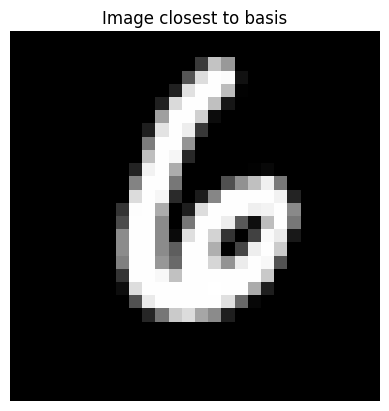

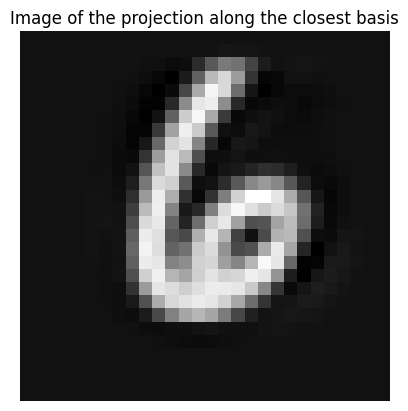

In [151]:
def most_likely(integer, digits, norm, B, d = 32):
    """
    Find the images with the smallest distance from the chosen integer spaces
    and plots its image and the projection.
    
    Parameters
    -----------
    integer: a int that is from the digits list
    digits: python list. Contains desired integers
    norm: list of all norm in thei basises
    B: Test dataset of images, stored columnwise
    """
    # Makes digits a numpy array
    digits = np.array(digits)

    # Creates the basis for the integer som it can be projected onto
    U, Σ, Vh = np.linalg.svd(train[:, integer,:], full_matrices=False)
    Σ = np.diag(Σ)
    W = truncSVD(U, Σ, Vh, d)[1]

    # Findes index value of the choosen integer in the digit list
    int_index = np.where(digits == integer)[0][0]

    # Finds the smallest value in the basis of the integer
    min_value = np.amin(norm[int_index,:])
    
    # Finds the possision of the image that is closest to the basis
    norm_index = tuple(zip(*np.where(norm == min_value)))[0]

    # Plot the one that is closest to the basis
    plt.title("Image closest to basis")
    plt.imshow(B[:, norm_index[1]].reshape((28,28)), cmap = 'gray') 
    plt.axis('off')
    plt.show()
    
    # Plot the projection along this basis
    plt.title("Image of the projection along the closest basis")
    plt.imshow(orthproj(W, B[:, norm_index[1]]).reshape((28,28)), cmap = 'gray') 
    plt.axis('off')
    plt.show()

# Chooses the integer
label = int(6)  

# Calcuates the distances used and plots the most likely image and its projection
distances = distance(B, train, "SVD", digits, d = 32)
most_likely(label, digits, distances, B, d = 32)

In this case we got that the most likely image containing one of the integers we chose was this image with the following index. The projection along the closes basis gives us a blurred image. We can just loop through the test images to find the misclassified image of the same class which is $6$.

# Task 3 d)
We will now select an image of that integer of the class 6 that was misclassified to find the main difference between that and the one we found above. We will discuss if the misclassified image have any features that are harder to capture compared to the other. The misclassified is a data point is the one that strongly deviates from the rest of the data.

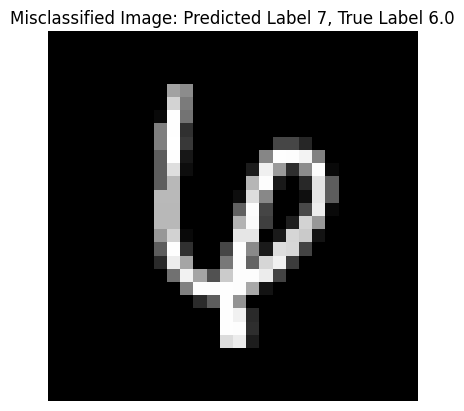

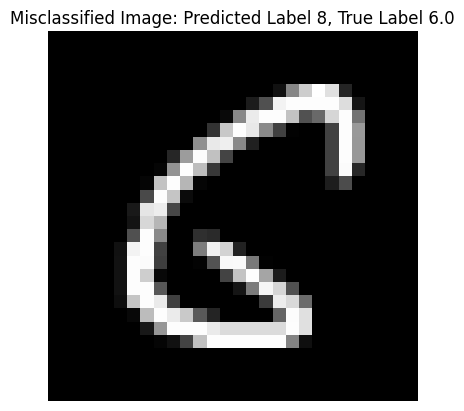

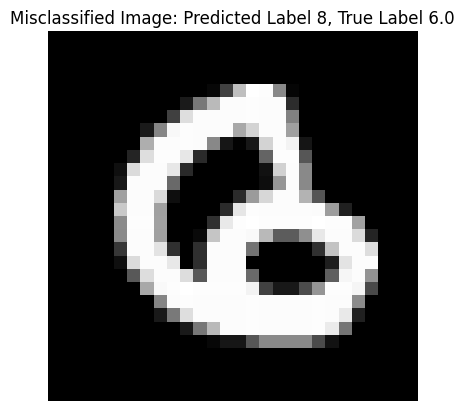

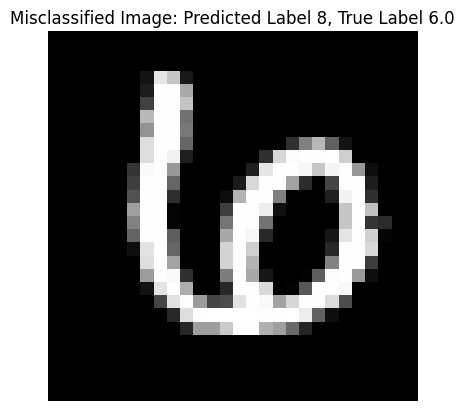

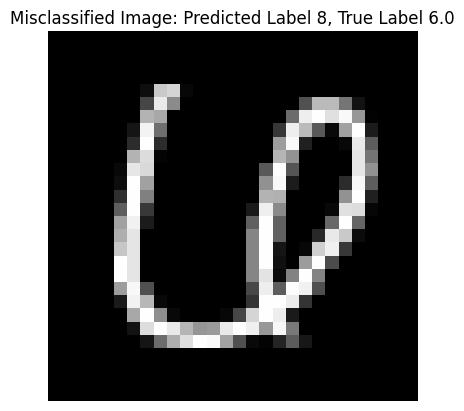

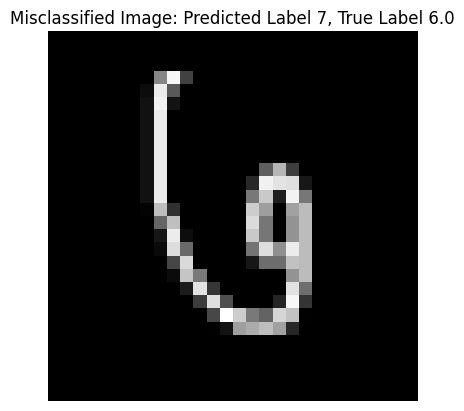

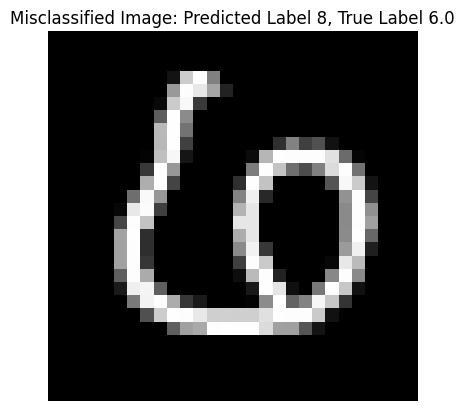

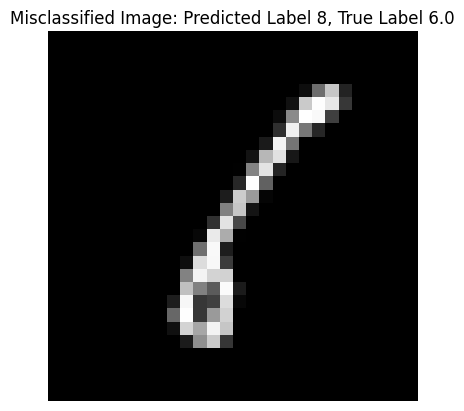

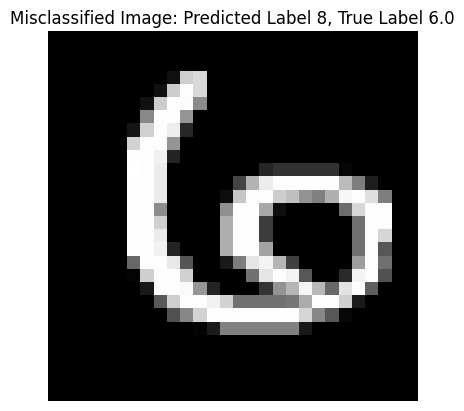

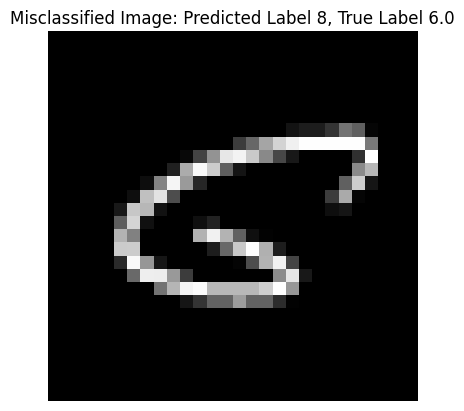

In [152]:
# Find indices of images that were misclassified
misclassified_indices = np.where(guesses != B_labels)[0]

# Filter misclassified images to only include those that belong to class its class
misclassified_six_indices = np.intersect1d(misclassified_indices, np.where(B_labels == label))

# Plot all misclassified images that belong to class 6
for index in misclassified_six_indices:
    misclassified_six_image = B[:, index].reshape(28, 28)
    plt.imshow(misclassified_six_image, cmap='gray')
    plt.title(f"Misclassified Image: Predicted Label {guesses[index]}, True Label {B_labels[index]}")
    plt.axis('off')
    plt.show()

We can see that the images are difficult to categorize for the machine. It predicts the digit number 6 as the integer 8 for instance. This makes sense as it is easy to confuse these two integers and the misclassified images are tough to identify either way.

It's likely that the incorrectly categorized image contains some characteristics that are poorly reflected in the training data. It might feature more intricate or uncommon patterns, for instance, that are not frequently observed in the training data. It would be more challenging for the classifier to correctly classify the image as a result.

Alternately, the incorrectly labeled image can be an outlier that significantly differs from the rest of the data. In this instance, it's possible that the classifier simply has trouble classifying the image and needs more training data or a more advanced classifier in order to do it correctly.

Even though the task asks for one image, we find that looking at several more clearly shows the types of characteristics that deviate.

# Task 3 e)

First 16 labels: 


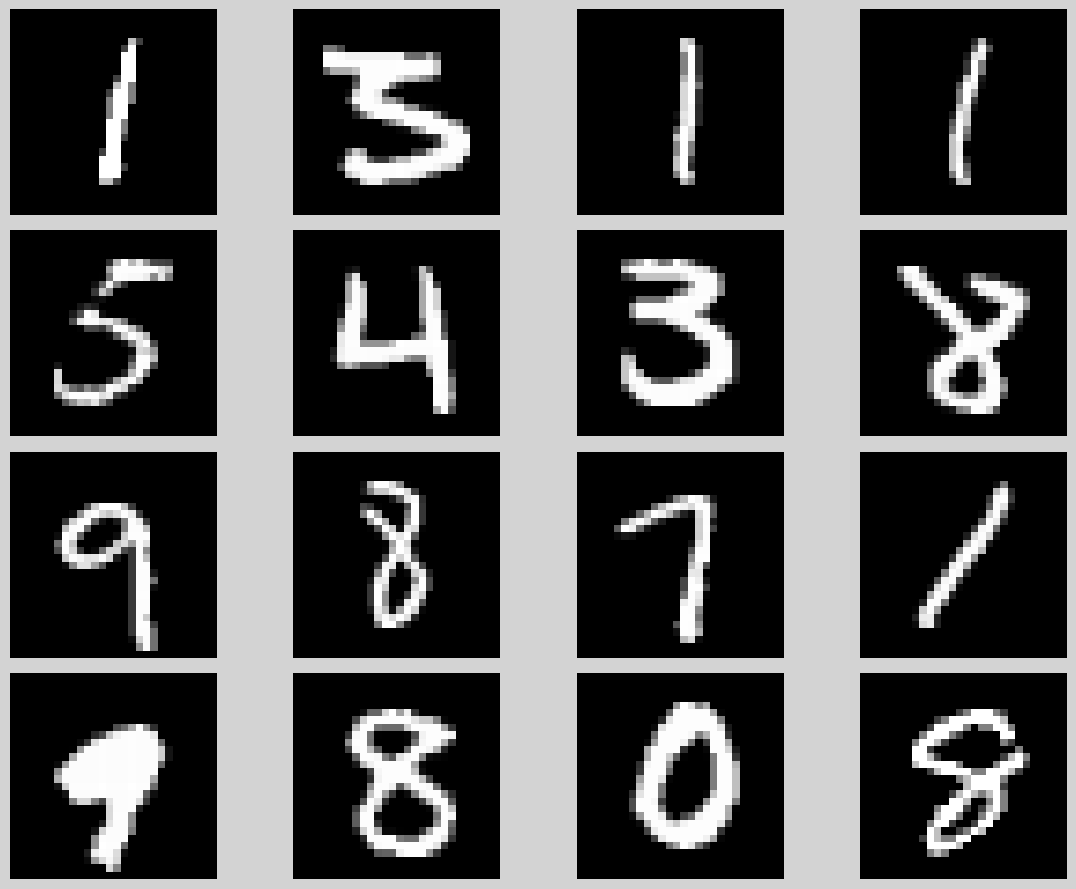

In [153]:
# Generate a test set with all the digits
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Runs the generate_test function for the test data
B, B_labels = generate_test(test,digits, N = 800)

# Plots the first 16 images
print("First 16 labels: ")
plotimgs(B, nplot = 4)

# Does the test for the SVD method
distances = distance(B, train, "SVD", digits, d = 32)
accuracy, guesses, min_values = guessImageAndCalculateAccuracies(digits, distances, B_labels)
recalls = findClassRecalls(guesses, B_labels)

# Does the test for the ENMF method
distances2 = distance(B, train, "ENMF", digits, d = 32)
accuracy2, guesses2, min_values2 = guessImageAndCalculateAccuracies(digits, distances2, B_labels)
recalls2 = findClassRecalls(guesses2, B_labels)

In [154]:
print("\nSVD")

# Prints the result of the SVD test
print("Accuracy: ", accuracy*100, "%")
print("Our guesses: ", guesses)
print("Lowest values of norm for each image: ", min_values)

print("-------- Recalls --------")
prettyTable(recalls, digits)


SVD
Accuracy:  95.0875 %
Our guesses:  [1 3 1 ... 5 7 0]
Lowest values of norm for each image:  [1.59408321 6.61908521 1.00325786 ... 4.69612587 5.10258774 2.64838656]
-------- Recalls --------

---- Recalls ----
+-----+--------+
|Class|Accuracy|
+-----+--------+
|  0  | 0.9912 |
|  1  | 0.9912 |
|  2  | 0.9400 |
|  3  | 0.9287 |
|  4  | 0.9700 |
|  5  | 0.9350 |
|  6  | 0.9637 |
|  7  | 0.9275 |
|  8  | 0.9313 |
|  9  | 0.9300 |
+-----+--------+


In [155]:
print("\nENMF")

# Prints the result of the EMNF test
print("Accuracy: ", accuracy2*100, "%")
print("Our guesses: ", guesses2)
print("Lowest values of norm for each image: ", min_values2)

print("-------- Recalls --------")
prettyTable(recalls2, digits)


ENMF
Accuracy:  89.1125 %
Our guesses:  [1 5 1 ... 5 4 0]
Lowest values of norm for each image:  [3.12363218 8.05312208 2.2618     ... 5.88523783 5.97287684 3.7081746 ]
-------- Recalls --------

---- Recalls ----
+-----+--------+
|Class|Accuracy|
+-----+--------+
|  0  | 0.9762 |
|  1  | 0.9825 |
|  2  | 0.9175 |
|  3  | 0.8500 |
|  4  | 0.8562 |
|  5  | 0.8562 |
|  6  | 0.9550 |
|  7  | 0.8250 |
|  8  | 0.8200 |
|  9  | 0.8725 |
+-----+--------+


We can see that the accuracy drops down compared to b). This is because we included an extra digit into our list. When the amount of digits to identify increase, the complexity of the classifications also increase. With more digits we have a greater chance of overlap in the feauture representations between different digits (in the dictionary), making it more difficult for our algorithms to accurately make a difference between these. This causes a decrement in accuracy.

Further the dimensions of the dictionary increase, that makes it more difficult to learn an effective dictionary that represents the data. The number of training samples needed for good accuracy will just increase exponentially, making it even harder to keep up. With our simple dictionary learning algorithms and feauture selection techniques, it works for a smaller, less complex set of data.

# Oppgave 3 f)

Furthermore, we want to do larger experiments to find out what the amount of basis vectors $d$ in our dictionaries will influence in our accuracy. In this case we choose the d values for $d = [2, 4, 8, 16, 32, 64, 128, 256, 384, 462, 492, 512, 534, 612, 681, 762, 916, 1024]$. To compare the accuracy against the amount of basis vectors $d$ for both SVD and ENMF approach, we can just plot this for each of the methods.

In [156]:
# Generate a test set with same digits as b plus one more
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

B, B_labels = generate_test(test, digits, N = 800)

# List for basis vectors
d = [2, 4, 8, 16, 32, 64, 128, 256, 384, 462, 492, 512, 534, 612, 681, 762, 916, 1024]

# Create empty arrays for both approaches
SVD_accuracy = np.zeros(len(d))
ENMF_accuracy = np.zeros(len(d))

# For loop that goes trough all the values in d
for i in range(len(d)):

    # Calculates the accuracy for all the values in d with both approaches
    SVD_accuracy[i] = guessImageAndCalculateAccuracies(digits, distance(B, train, "SVD", digits, d[i]), B_labels)[0]
    ENMF_accuracy[i] = guessImageAndCalculateAccuracies(digits, distance(B, train, "ENMF", digits, d[i]), B_labels)[0]

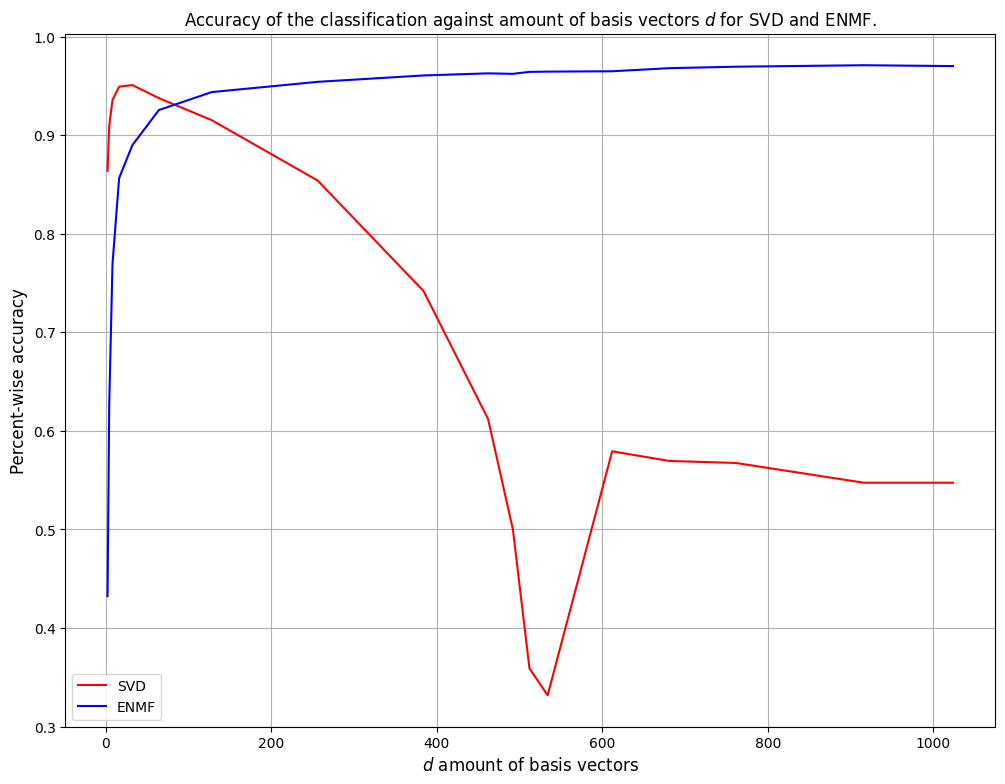

In [157]:
plt.figure(figsize=(12,9))
plt.title(rf'Accuracy of the classification against amount of basis vectors $d$ for SVD and ENMF.', fontsize=12)

# Plot the SVD data
plt.plot(d, SVD_accuracy, color='red', label='SVD')

# Plot the ENMF data
plt.plot(d, ENMF_accuracy, color='blue', label='ENMF')

plt.xlabel(rf'$d$ amount of basis vectors', fontsize=12)
plt.ylabel(rf'Percent-wise accuracy', fontsize=12)
plt.grid()

# Add a legend
plt.legend()

plt.show()

For small values ​​of d, we may not have enough basis vectors to accurately represent the data, which can lead to poor accuracy. On the other hand, for very large values ​​of d, overfitting can occur, in which the model becomes too complex and fits the training data too closely, resulting in poor generalization to test data. 

Compared to the results of Problem 2, where we projected the test data onto a single basis vector, we can expect that using more basis vectors  generally improves the accuracy of our method. This is because by using more basis vectors, we can capture more complex relationships in the data. For the SVD we see some numerical approximation errors after a certain $d$.

SVD and ENMF methods may perform differently depending on the dataset and d values ​​used. In general, SVD performs well on data sets with low order structure, while ENMF can perform well on  non-negative data and data sets with sparse structure. 

To determine which value of d gives the best accuracy for each method, we need to evaluate the performance of the model on the validation or test set. The graph shows that for both methods accuracy generally improves as d is increased, but there may be a point where increasing d no longer significantly improves accuracy. The optimal value of d would be the value with the highest accuracy in the validation or test set.

# Discussion and conclusion

In this project, SVD and ENMF, two distinct approaches to image categorization, have been investigated. Both approaches use dictionaries to represent images, but SVD uses basis vectors derived from the SVD decomposition of the image data matrix, whereas ENMF builds a dictionary from scratch using the input data. Both techniques were used on the MNIST dataset, and their effectiveness was assessed using a test set.

What we observered shows that while ENMF performs somewhat better than SVD, both algorithms get really good classification accuracy. When the quantity of basis vectors or dictionary atoms rises, so does the performance of both techniques. However, compared to SVD, ENMF just uses much more calculation time and memory.

The ease of use and interpretability of SVD is one of its benefits. It is simple to visualize the basis vectors created using SVD and they shed light on the fundamental structure of the image data. When compared to ENMF, SVD also consumes a lot less memory and computing time. Yet, it's possible that the basis vectors produced by SVD don't always fully represent the important aspects of the data. SVD shows some accuracy issues at certain $d$ basis vector values, which may be caused from numerical approximation errors or underfitting/overfitting.

On the other hand, ENMF has the ability to learn a lexicon that is customized to the particular facts at hand. As shown in our research, this can lead to performance that is superior to SVD. The parameters for ENMF must be carefully tuned because it is a more complicated system. In comparison to SVD, it is also computationally more difficult.

Overall, our project shows clearly that both SVD and ENMF can be effective methods for image classification. However, ENMF has some limitations. It is computationally more expensive than SVD, especially for large-scale problems as we can see. Our last code which uses a large amount of data, spends almost 5 minutes to run. Also, ENMF assumes that the data is non-negative, which may not always be the case in practice (in this case it is). In contrast, SVD can handle both positive and negative data, but it may not provide a parts-based representation of the data. You essentially have to pay for quality (ENMF) with time.